In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [4]:
train.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [5]:
test.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,...,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,...,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,...,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,...,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,...,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440


In [6]:
train.columns = ['tracking_id', 'datetime', 'wind_speed', 'atmospheric_temperature', 'shaft_temperature', 'blades_angle',
                'gearbox_temperature', 'engine_temperature', 'motor_torque', 'generator_temperature', 'atmospheric_pressure',
                'area_temperature', 'windmill_body_temperature', 'wind_direction', 'resistance', 'rotor_torque',
                'turbine_status', 'cloud_level', 'blade_length', 'blade_breadth', 'windmill_height', 'windmill_generated_power']

# 데이터 확인, 결측치 처리, 기초통계하기

In [7]:
train.shape

(28200, 22)

In [8]:
train.isna().sum()

tracking_id                     0
datetime                        0
wind_speed                    273
atmospheric_temperature      3450
shaft_temperature               2
blades_angle                  216
gearbox_temperature             1
engine_temperature             12
motor_torque                   24
generator_temperature          12
atmospheric_pressure         2707
area_temperature                0
windmill_body_temperature    2363
wind_direction               5103
resistance                      1
rotor_torque                  572
turbine_status               1759
cloud_level                   276
blade_length                 5093
blade_breadth                   0
windmill_height               543
windmill_generated_power      207
dtype: int64

In [9]:
test.isna().sum()

tracking_id                         0
datetime                            0
wind_speed(m/s)                   126
atmospheric_temperature(°C)      1427
shaft_temperature(°C)               1
blades_angle(°)                   106
gearbox_temperature(°C)             1
engine_temperature(°C)              5
motor_torque(N-m)                  11
generator_temperature(°C)           5
atmospheric_pressure(Pascal)     1151
area_temperature(°C)                1
windmill_body_temperature(°C)     926
wind_direction(°)                2160
resistance(ohm)                     0
rotor_torque(N-m)                 281
turbine_status                    797
cloud_level                       125
blade_length(m)                  2114
blade_breadth(m)                    0
windmill_height(m)                255
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tracking_id                28200 non-null  object 
 1   datetime                   28200 non-null  object 
 2   wind_speed                 27927 non-null  float64
 3   atmospheric_temperature    24750 non-null  float64
 4   shaft_temperature          28198 non-null  float64
 5   blades_angle               27984 non-null  float64
 6   gearbox_temperature        28199 non-null  float64
 7   engine_temperature         28188 non-null  float64
 8   motor_torque               28176 non-null  float64
 9   generator_temperature      28188 non-null  float64
 10  atmospheric_pressure       25493 non-null  float64
 11  area_temperature           28200 non-null  float64
 12  windmill_body_temperature  25837 non-null  float64
 13  wind_direction             23097 non-null  flo

In [11]:
set(train["turbine_status"])

{'A',
 'A2',
 'AAA',
 'AB',
 'ABC',
 'AC',
 'B',
 'B2',
 'BA',
 'BB',
 'BBB',
 'BCB',
 'BD',
 'D',
 nan}

In [12]:
set(train["cloud_level"])

{'Extremely Low', 'Low', 'Medium', nan}

In [13]:
train.columns

Index(['tracking_id', 'datetime', 'wind_speed', 'atmospheric_temperature',
       'shaft_temperature', 'blades_angle', 'gearbox_temperature',
       'engine_temperature', 'motor_torque', 'generator_temperature',
       'atmospheric_pressure', 'area_temperature', 'windmill_body_temperature',
       'wind_direction', 'resistance', 'rotor_torque', 'turbine_status',
       'cloud_level', 'blade_length', 'blade_breadth', 'windmill_height',
       'windmill_generated_power'],
      dtype='object')

In [14]:
train = train.drop(['tracking_id', 'datetime', 'wind_speed', 'atmospheric_temperature', 'atmospheric_pressure', 'area_temperature', 'wind_direction', 'cloud_level'], axis = 1)

In [15]:
train.columns

Index(['shaft_temperature', 'blades_angle', 'gearbox_temperature',
       'engine_temperature', 'motor_torque', 'generator_temperature',
       'windmill_body_temperature', 'resistance', 'rotor_torque',
       'turbine_status', 'blade_length', 'blade_breadth', 'windmill_height',
       'windmill_generated_power'],
      dtype='object')

In [16]:
train.head()

,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,windmill_body_temperature,resistance,rotor_torque,turbine_status,blade_length,blade_breadth,windmill_height,windmill_generated_power
0,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,NaN,2730.310605,42.084666,BA,2.217542,0.314065,24.281689,6.766521
1,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,NaN,1780.207200,107.888643,A2,4.210346,0.448494,27.262139,5.966275
2,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,45.033197,1666.049900,-42.931459,ABC,2.719475,0.302321,27.366127,2.874342
3,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,44.827154,1964.502895,42.744596,ABC,4.857385,0.367140,24.287767,14.851089
4,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,-99.000000,1177.516152,13.387289,AAA,NaN,0.453374,27.971650,3.519074


In [17]:
list(train.select_dtypes(include=[np.int64, np.float64]).columns)

['shaft_temperature',
 'blades_angle',
 'gearbox_temperature',
 'engine_temperature',
 'motor_torque',
 'generator_temperature',
 'windmill_body_temperature',
 'resistance',
 'rotor_torque',
 'blade_length',
 'blade_breadth',
 'windmill_height',
 'windmill_generated_power']

In [18]:
train['shaft_temperature'].fillna(train['shaft_temperature'].median(),inplace=True)
train['blades_angle'].fillna(train['blades_angle'].median(),inplace=True)
train['gearbox_temperature'].fillna(train['gearbox_temperature'].median(),inplace=True)
train['engine_temperature'].fillna(train['engine_temperature'].median(),inplace=True)
train['motor_torque'].fillna(train['motor_torque'].median(),inplace=True)
train['generator_temperature'].fillna(train['generator_temperature'].median(),inplace=True)
train['windmill_body_temperature'].fillna(train['windmill_body_temperature'].median(),inplace=True)
train['resistance'].fillna(train['resistance'].median(),inplace=True)
train['rotor_torque'].fillna(train['rotor_torque'].median(),inplace=True)
train['blade_length'].fillna(train['blade_length'].median(),inplace=True)
train['blade_breadth'].fillna(train['blade_breadth'].median(),inplace=True)
train['windmill_height'].fillna(train['windmill_height'].median(),inplace=True)
train['turbine_status'].fillna(train['turbine_status'].mode()[0],inplace=True)

In [19]:
train.isnull().sum()

shaft_temperature              0
blades_angle                   0
gearbox_temperature            0
engine_temperature             0
motor_torque                   0
generator_temperature          0
windmill_body_temperature      0
resistance                     0
rotor_torque                   0
turbine_status                 0
blade_length                   0
blade_breadth                  0
windmill_height                0
windmill_generated_power     207
dtype: int64

In [20]:
train = train.dropna()

In [21]:
train.describe()

,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,windmill_body_temperature,resistance,rotor_torque,blade_length,blade_breadth,windmill_height,windmill_generated_power
count,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000
mean,40.078965,-9.587231,41.003526,42.610355,1710.719565,65.017024,22.617353,1575.445992,25.992658,2.466370,0.397247,25.885120,6.130529
std,27.195866,47.743246,43.681250,6.130610,826.649495,19.806222,52.411183,483.393647,32.118038,10.235341,0.061210,7.694981,2.697520
min,-99.000000,-146.259543,-244.974098,3.167151,500.000000,33.893779,-999.000000,-1005.222988,-136.732217,-99.000000,0.200111,-30.295253,0.962305
25%,41.633887,-1.194330,40.555888,41.912129,870.566463,41.197711,40.847389,1267.677528,13.829195,2.735955,0.347345,24.469142,4.059505
50%,43.684385,-0.495608,43.219331,43.525297,2031.849540,70.721663,42.786832,1678.238404,32.977192,3.453333,0.398587,25.957739,5.764710
75%,45.672663,5.366545,45.874762,45.168744,2460.920954,78.920508,44.323545,1828.536126,41.324371,4.156238,0.449440,27.450598,7.947195
max,169.820455,165.932123,999.000000,50.000000,3000.000000,100.000000,323.000000,4693.481933,236.883264,18.209800,0.499975,78.351335,20.175358


In [22]:
test.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m)
count,11960.000000,10659.000000,12085.000000,11980.000000,12085.000000,12081.000000,12075.000000,12081.000000,1.093500e+04,12085.000000,11160.000000,9926.000000,12086.000000,11805.000000,9972.000000,12086.000000,11831.000000
mean,69.381862,0.687445,39.936571,-9.218509,40.318639,42.604738,1717.343991,65.237894,5.428332e+04,32.796168,20.906469,308.376140,1581.289398,26.566581,2.201328,0.397527,25.963743
std,76.119487,44.051104,27.114499,47.574365,42.481822,6.215124,829.809203,19.868135,1.872562e+05,7.671919,53.291337,133.923293,483.125121,32.103827,11.513251,0.061661,7.716063
min,-525.530600,-99.000000,-99.000000,-99.000000,-185.860883,-5.000000,500.000000,30.000000,-1.207259e+06,-30.000000,-99.000000,0.000000,-1654.449587,-182.169613,-99.000000,0.200009,-21.215639
25%,21.809823,8.118199,41.635406,-1.191777,40.460379,41.925716,874.238660,41.283334,1.679650e+04,27.406656,40.366937,238.782318,1272.310773,13.760163,2.520990,0.346909,24.452970
50%,93.338083,16.177184,43.707769,-0.497108,43.219752,43.553196,2032.285162,70.797759,1.820142e+04,32.658467,42.788389,272.047526,1680.225602,33.090562,3.434327,0.399637,25.950314
75%,95.251808,23.855116,45.756032,6.232264,45.840152,45.228475,2480.423058,79.432294,1.183212e+05,38.302814,44.506596,408.668722,1837.302026,41.976934,4.342784,0.450488,27.490102
max,525.434211,80.442232,183.299983,170.047823,563.000000,49.858945,2997.013769,99.571599,1.127571e+06,53.927698,191.979747,570.857751,4106.196001,213.260076,17.847936,0.499985,77.604969


In [23]:
train.describe(include = "object")

,turbine_status
count,27993
unique,14
top,BB
freq,3677


# EDA, 상관관계 분석

In [29]:
(train.select_dtypes(include=[np.int64, np.float64]).columns)

Index(['shaft_temperature', 'blades_angle', 'gearbox_temperature',
       'engine_temperature', 'motor_torque', 'generator_temperature',
       'windmill_body_temperature', 'resistance', 'rotor_torque',
       'blade_length', 'blade_breadth', 'windmill_height',
       'windmill_generated_power'],
      dtype='object')

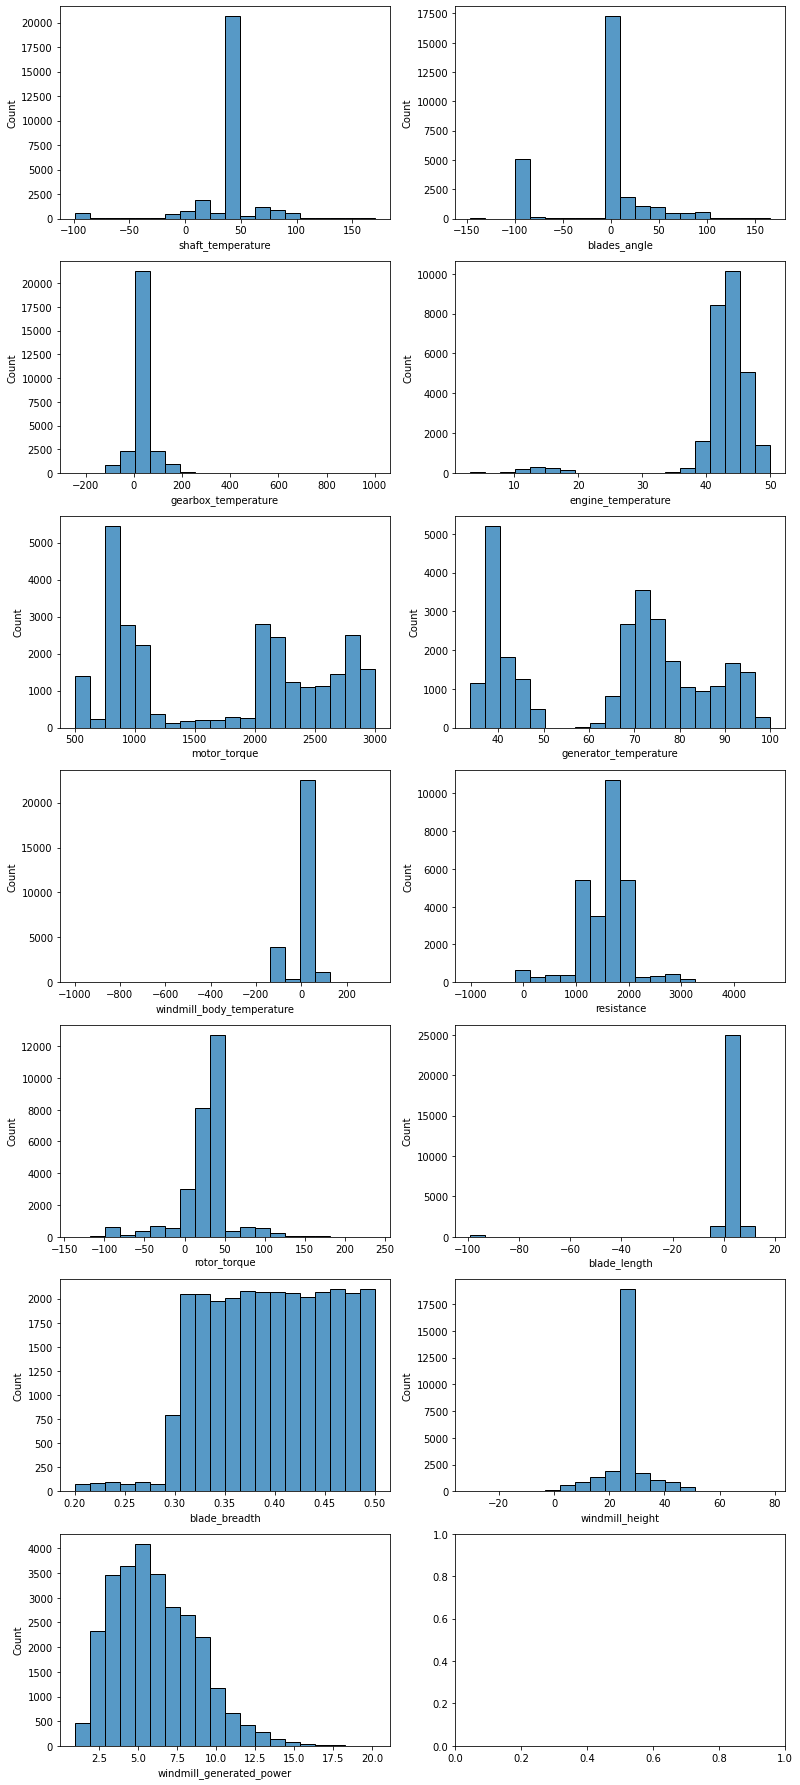

In [53]:
fig, axs = plt.subplots(nrows=7, ncols = 2, figsize=(13,32))

ax = sns.histplot(x="shaft_temperature", data=train, ax = axs[0,0], bins= 20)
ax = sns.histplot(x="blades_angle", data=train, ax = axs[0,1], bins= 20)
ax = sns.histplot(x="gearbox_temperature", data=train, ax = axs[1,0], bins= 20)
ax = sns.histplot(x="engine_temperature", data=train, ax = axs[1,1], bins= 20)
ax = sns.histplot(x="motor_torque", data=train, ax = axs[2,0], bins= 20)
ax = sns.histplot(x="generator_temperature", data=train, ax = axs[2,1], bins= 20)
ax = sns.histplot(x="windmill_body_temperature", data=train, ax = axs[3,0], bins= 20)
ax = sns.histplot(x="resistance", data=train, ax = axs[3,1], bins= 20)
ax = sns.histplot(x="rotor_torque", data=train, ax = axs[4,0], bins= 20)
ax = sns.histplot(x="blade_length", data=train, ax = axs[4,1], bins= 20)
ax = sns.histplot(x="blade_breadth", data=train, ax = axs[5,0], bins= 20)
ax = sns.histplot(x="windmill_height", data=train, ax = axs[5,1], bins= 20)
ax = sns.histplot(x="windmill_generated_power", data=train, ax = axs[6,0], bins= 20)

In [157]:
train

,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,windmill_body_temperature,resistance,rotor_torque,turbine_status,blade_length,blade_breadth,windmill_height,windmill_generated_power
0,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,42.786832,2730.310605,42.084666,BA,2.217542,0.314065,24.281689,6.766521
1,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,42.786832,1780.207200,107.888643,A2,4.210346,0.448494,27.262139,5.966275
2,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,45.033197,1666.049900,-42.931459,ABC,2.719475,0.302321,27.366127,2.874342
3,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,44.827154,1964.502895,42.744596,ABC,4.857385,0.367140,24.287767,14.851089
4,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,-99.000000,1177.516152,13.387289,AAA,3.453333,0.453374,27.971650,3.519074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,44.242269,1980.861921,45.909054,BB,2.774335,0.418299,24.590801,9.587934
28196,42.068979,-99.000000,44.285153,43.487939,2207.882276,72.244645,43.616412,1712.840457,36.974913,BB,-3.250989,0.461531,26.051604,4.522195
28197,45.004213,9.550358,49.377706,44.042632,2801.657374,94.814637,43.576510,1951.728713,88.319152,D,3.453333,0.380264,28.533850,11.096599
28198,48.032624,3.051389,81.443896,44.821365,2760.647280,90.144418,44.973415,1968.917692,47.562627,BCB,3.001855,0.346447,47.747269,9.373239


<AxesSubplot:ylabel='turbine_status'>

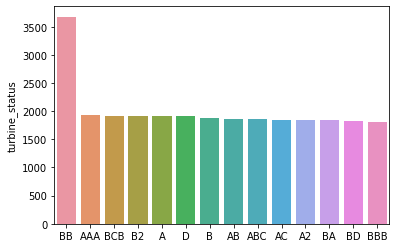

In [158]:
sns.barplot(y = train.turbine_status.value_counts(),
            x = train.turbine_status.value_counts().index)

In [159]:
pd.get_dummies(train)

,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,windmill_body_temperature,resistance,rotor_torque,blade_length,...,turbine_status_ABC,turbine_status_AC,turbine_status_B,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D
0,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,42.786832,2730.310605,42.084666,2.217542,...,0,0,0,0,1,0,0,0,0,0
1,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,42.786832,1780.207200,107.888643,4.210346,...,0,0,0,0,0,0,0,0,0,0
2,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,45.033197,1666.049900,-42.931459,2.719475,...,1,0,0,0,0,0,0,0,0,0
3,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,44.827154,1964.502895,42.744596,4.857385,...,1,0,0,0,0,0,0,0,0,0
4,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,-99.000000,1177.516152,13.387289,3.453333,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,44.242269,1980.861921,45.909054,2.774335,...,0,0,0,0,0,1,0,0,0,0
28196,42.068979,-99.000000,44.285153,43.487939,2207.882276,72.244645,43.616412,1712.840457,36.974913,-3.250989,...,0,0,0,0,0,1,0,0,0,0
28197,45.004213,9.550358,49.377706,44.042632,2801.657374,94.814637,43.576510,1951.728713,88.319152,3.453333,...,0,0,0,0,0,0,0,0,0,1
28198,48.032624,3.051389,81.443896,44.821365,2760.647280,90.144418,44.973415,1968.917692,47.562627,3.001855,...,0,0,0,0,0,0,0,1,0,0


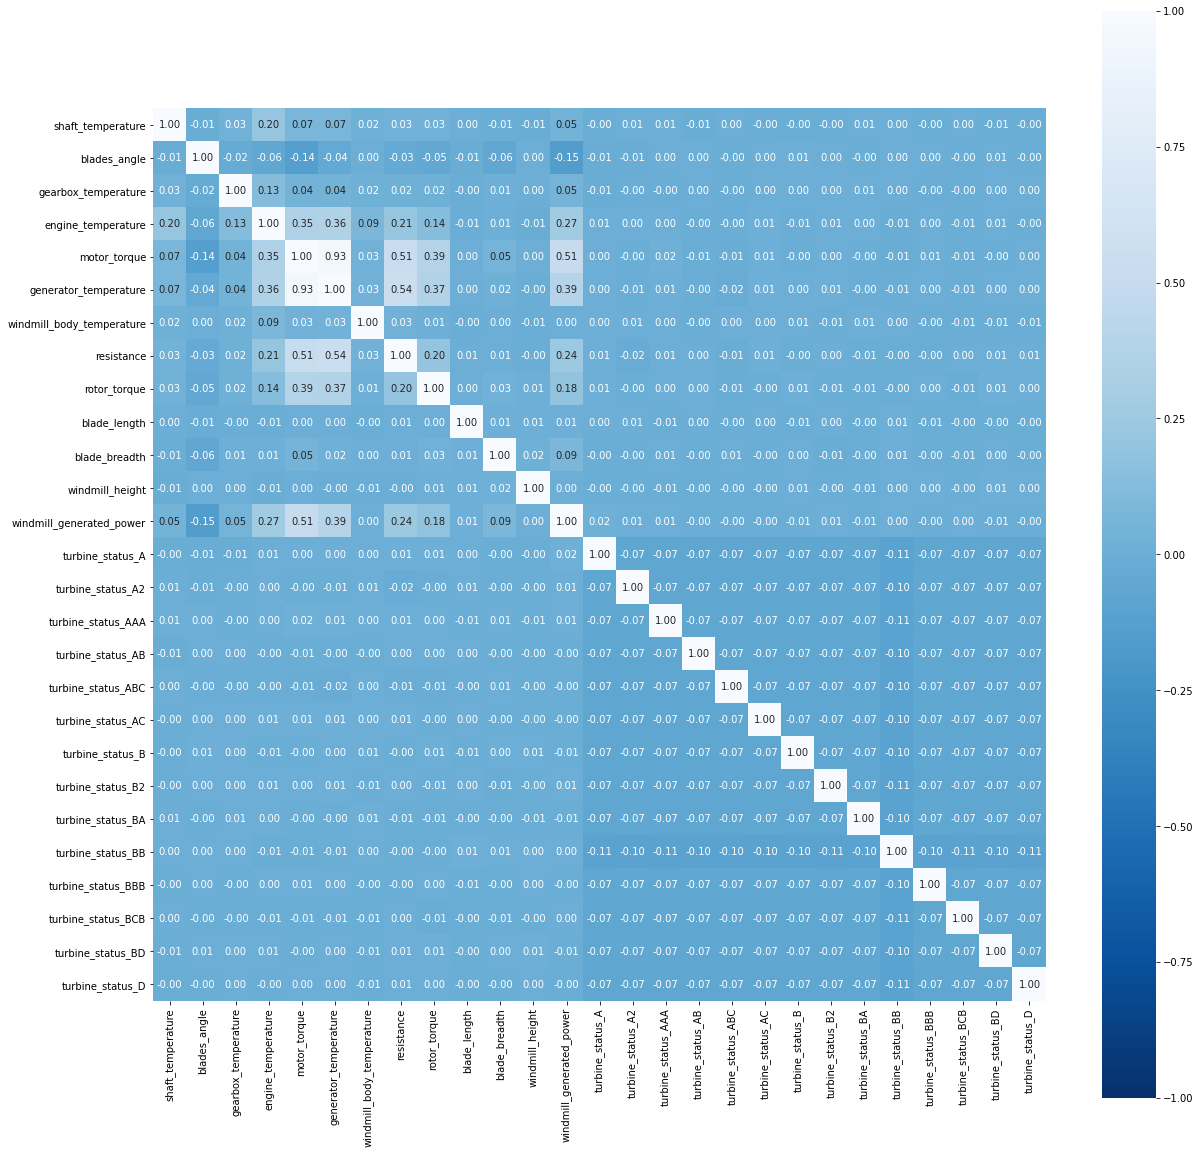

{'corr':                            shaft_temperature  blades_angle  \
 shaft_temperature                   1.000000     -0.009825   
 blades_angle                       -0.009825      1.000000   
 gearbox_temperature                 0.029929     -0.024755   
 engine_temperature                  0.204124     -0.064902   
 motor_torque                        0.070655     -0.137390   
 generator_temperature               0.074271     -0.043948   
 windmill_body_temperature           0.018469      0.003097   
 resistance                          0.032151     -0.032810   
 rotor_torque                        0.027233     -0.047584   
 blade_length                        0.000116     -0.007856   
 blade_breadth                      -0.005411     -0.060504   
 windmill_height                    -0.008772      0.003394   
 windmill_generated_power            0.046554     -0.154130   
 turbine_status_A                   -0.000692     -0.007937   
 turbine_status_A2                   0.006417  

In [160]:
from dython import nominal

nominal.associations(pd.get_dummies(train), figsize=(20,20),cmap = "Blues_r")

# 모델 학습

In [161]:
X = train.drop(['windmill_generated_power'], axis = 1)
y = train['windmill_generated_power']

In [162]:
X

,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,windmill_body_temperature,resistance,rotor_torque,turbine_status,blade_length,blade_breadth,windmill_height
0,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,42.786832,2730.310605,42.084666,BA,2.217542,0.314065,24.281689
1,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,42.786832,1780.207200,107.888643,A2,4.210346,0.448494,27.262139
2,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,45.033197,1666.049900,-42.931459,ABC,2.719475,0.302321,27.366127
3,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,44.827154,1964.502895,42.744596,ABC,4.857385,0.367140,24.287767
4,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,-99.000000,1177.516152,13.387289,AAA,3.453333,0.453374,27.971650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,44.242269,1980.861921,45.909054,BB,2.774335,0.418299,24.590801
28196,42.068979,-99.000000,44.285153,43.487939,2207.882276,72.244645,43.616412,1712.840457,36.974913,BB,-3.250989,0.461531,26.051604
28197,45.004213,9.550358,49.377706,44.042632,2801.657374,94.814637,43.576510,1951.728713,88.319152,D,3.453333,0.380264,28.533850
28198,48.032624,3.051389,81.443896,44.821365,2760.647280,90.144418,44.973415,1968.917692,47.562627,BCB,3.001855,0.346447,47.747269


In [163]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['shaft_temperature',
                                    'blades_angle',
                                    'gearbox_temperature',
                                    'engine_temperature',
                                    'motor_torque',
                                    'generator_temperature',
                                    'windmill_body_temperature',
                                    'resistance',
                                    'rotor_torque',
                                    'blade_length',
                                    'blade_breadth',
                                    'windmill_height']),
                         ("onehot", OneHotEncoder(sparse = False), ['turbine_status'])])

In [164]:
ct.fit(X)
X = ct.transform(X)

In [165]:
X

array([[ 0.06045344,  0.18188884,  0.94795333, ...,  0.        ,
         0.        ,  0.        ],
       [-5.11406588, -1.87281704,  0.07100182, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06532391,  0.46583326,  0.03018677, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.18110608,  0.40085106,  0.1917145 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29246364,  0.26472533,  0.92582269, ...,  1.        ,
         0.        ,  0.        ],
       [-1.13470584,  0.25513741, -0.01696976, ...,  0.        ,
         0.        ,  0.        ]])

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)  

In [169]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

print("k-nn의 학습용 데이터 정확도: {:.2f}".format(knn.score(X_train, y_train)))
print("k-nn의 평가용 데이터 정확도: {:.2f}".format(knn.score(X_test, y_test)))

k-nn의 학습용 데이터 정확도: 0.79
k-nn의 평가용 데이터 정확도: 0.67


In [121]:
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(random_state=42)
randomforest.fit(X_train, y_train)

print("랜덤 포레스트의 학습용 데이터 정확도: {:.2f}".format(randomforest.score(X_train, y_train)))
print("랜덤 포레스트의 평가용 데이터 정확도: {:.2f}".format(randomforest.score(X_test, y_test)))

랜덤 포레스트의 학습용 데이터 정확도: 0.99
랜덤 포레스트의 평가용 데이터 정확도: 0.96


In [100]:
test

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,...,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,...,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,...,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,...,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,...,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,WM_13376,2019-02-12 11:33:20,-15.039400,18.517204,43.545409,-1.094038,44.550547,44.486619,2424.370244,75.850209,...,28.424722,42.128526,509.795489,1798.141681,-14.365696,NaN,Medium,3.286975,0.407771,20.888674
12082,WM_1630,2018-11-12 17:33:20,97.594116,-99.000000,44.747916,1.750553,43.308176,42.848779,2085.627252,73.091866,...,50.615296,47.353528,345.705839,1680.245230,-7.062661,AB,Low,NaN,0.367823,24.793606
12083,WM_24703,2019-05-27 11:53:20,16.186805,8.109976,43.252012,-0.691090,214.904165,41.177782,788.687177,39.514258,...,20.983939,41.768478,205.569627,2343.165194,12.331790,BA,Low,3.728375,0.459887,5.653451
12084,WM_22893,2019-05-13 21:53:20,93.254033,-99.000000,43.841789,-1.171974,41.976913,42.039796,2079.855634,71.482324,...,29.114305,82.750271,260.578999,1732.883672,NaN,A,Medium,2.247676,0.394680,24.591364


In [101]:
tracking_id = test['tracking_id']
datetime = test['datetime']

In [102]:
test.columns = ['tracking_id', 'datetime', 'wind_speed', 'atmospheric_temperature', 'shaft_temperature', 'blades_angle',
                'gearbox_temperature', 'engine_temperature', 'motor_torque', 'generator_temperature', 'atmospheric_pressure',
                'area_temperature', 'windmill_body_temperature', 'wind_direction', 'resistance', 'rotor_torque',
                'turbine_status', 'cloud_level', 'blade_length', 'blade_breadth', 'windmill_height']

In [103]:
test = test.drop(['tracking_id', 'datetime', 'wind_speed', 'atmospheric_temperature', 'atmospheric_pressure', 'area_temperature', 'wind_direction', 'cloud_level'], axis = 1)

In [104]:
len(test.columns)

13

In [105]:
test['shaft_temperature'].fillna(test['shaft_temperature'].median(),inplace=True)
test['blades_angle'].fillna(test['blades_angle'].median(),inplace=True)
test['gearbox_temperature'].fillna(test['gearbox_temperature'].median(),inplace=True)
test['engine_temperature'].fillna(test['engine_temperature'].median(),inplace=True)
test['motor_torque'].fillna(test['motor_torque'].median(),inplace=True)
test['generator_temperature'].fillna(test['generator_temperature'].median(),inplace=True)
test['windmill_body_temperature'].fillna(test['windmill_body_temperature'].median(),inplace=True)
test['resistance'].fillna(test['resistance'].median(),inplace=True)
test['rotor_torque'].fillna(test['rotor_torque'].median(),inplace=True)
test['blade_length'].fillna(test['blade_length'].median(),inplace=True)
test['blade_breadth'].fillna(test['blade_breadth'].median(),inplace=True)
test['windmill_height'].fillna(test['windmill_height'].median(),inplace=True)
test['turbine_status'].fillna(test['turbine_status'].mode()[0],inplace=True)

In [106]:
scaled_test = ct.transform(test)

In [107]:
test_pred = randomforest.predict(scaled_test)

In [170]:
from sklearn.model_selection import GridSearchCV

params = [{'n_estimators': [10, 100, 1000],
           'max_depth': [1, 5, 10]}
         ]

randomforest_gs = GridSearchCV(randomforest,
                                  params,
                                  cv=10,
                                  verbose=2)

randomforest_gs.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.1s
[CV] END ......................max_depth=1, n_estimators=100; total time=   1.4s
[CV] END ......................max_depth=1, n_es

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_depth': [1, 5, 10],
                          'n_estimators': [10, 100, 1000]}],
             verbose=2)

In [171]:
best_model = randomforest_gs.best_estimator_

In [172]:
randomforest_gs.best_params_

{'max_depth': 10, 'n_estimators': 1000}

In [173]:
randomforest_gs.best_score_

0.9570220091248997

In [130]:
y_predict = best_model.predict(scaled_test)

In [131]:
submission = pd.DataFrame({'tracking_id': tracking_id,
                          'datetime': datetime,
                           'windmill_generated_power(kW/h)': y_predict})

In [132]:
submission.to_csv("my_submisson.csv", index = False)